## Malware con MiniSom

In [1]:
#Importando Librerias

from minisom import MiniSom
import numpy as np
import pandas as pd


In [2]:
#Cargando dataset

data = pd.read_csv('C:\\Users\\dieku\\Documents\\GitHub\\cyberseguridad-code\\Experimentos\\Dataset_benigno_ransomware\\Dataset01.csv')
data

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,Label
0,13,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.000000,21.897488,153846.153800,1.040000e+07,Benigno
1,15,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.000000,21.897488,133333.333300,9.000000e+06,Benigno
2,14,0,2,0,111,-1,40.0,-1,71,0.0,55.5,0.000000,21.897488,142857.142900,7.928571e+06,Benigno
3,0,0,1,0,83,-1,83.0,-1,83,0.0,83.0,0.000000,0.000000,0.000000,0.000000e+00,Benigno
4,13,0,2,0,159,-1,52.0,-1,107,0.0,79.5,0.000000,38.878014,153846.153800,1.220000e+07,Benigno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212790,6935,55118503,51,55,8844,12692,52.0,52,52,52.0,52.0,0.000000,0.000000,3944.773176,7.218935e+05,Ransomware
212791,4053974,30711742,24,25,2652,12942,52.0,40,-1,40.0,0.0,1.000000,0.000000,0.000000,0.000000e+00,Ransomware
212792,5744,66134134,11,16,1198,16758,52.0,1390,40,1390.0,40.0,0.447214,0.000000,0.000000,0.000000e+00,Ransomware
212793,56624,2439519,12,23,902,21363,52.0,-1,83,0.0,67.5,0.000000,21.897488,8163.265306,5.510204e+05,Benigno


In [3]:
#Funciones para normalizacion.

""" Si el label es benigno entonces retorna un 0 si no (ramsonware),
retorna un 1
"""
def transform_label(x):
    return 1 if(x == 'Benigno') else 0

def matirx_binary_label(x, name):
    if(x == name):
        return 1
    else:
        return 0



#Modificando data set (Normalizando)

data['Tipo'] = data['Label'].apply(transform_label)
data['benignoLabel']=data['Label'].apply(matirx_binary_label, name='Benigno')
data['ransomwareLabel']=data['Label'].apply(matirx_binary_label, name='Ransomware')

data


,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,Label,Tipo,benignoLabel,ransomwareLabel
0,13,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.000000,21.897488,153846.153800,1.040000e+07,Benigno,1,1,0
1,15,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.000000,21.897488,133333.333300,9.000000e+06,Benigno,1,1,0
2,14,0,2,0,111,-1,40.0,-1,71,0.0,55.5,0.000000,21.897488,142857.142900,7.928571e+06,Benigno,1,1,0
3,0,0,1,0,83,-1,83.0,-1,83,0.0,83.0,0.000000,0.000000,0.000000,0.000000e+00,Benigno,1,1,0
4,13,0,2,0,159,-1,52.0,-1,107,0.0,79.5,0.000000,38.878014,153846.153800,1.220000e+07,Benigno,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212790,6935,55118503,51,55,8844,12692,52.0,52,52,52.0,52.0,0.000000,0.000000,3944.773176,7.218935e+05,Ransomware,0,0,1
212791,4053974,30711742,24,25,2652,12942,52.0,40,-1,40.0,0.0,1.000000,0.000000,0.000000,0.000000e+00,Ransomware,0,0,1
212792,5744,66134134,11,16,1198,16758,52.0,1390,40,1390.0,40.0,0.447214,0.000000,0.000000,0.000000e+00,Ransomware,0,0,1
212793,56624,2439519,12,23,902,21363,52.0,-1,83,0.0,67.5,0.000000,21.897488,8163.265306,5.510204e+05,Benigno,1,1,0


In [4]:
data.drop(axis=1, inplace=True,columns=['Label'])#Eliminamos Label de la data
data

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,Tipo,benignoLabel,ransomwareLabel
0,13,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.000000,21.897488,153846.153800,1.040000e+07,1,1,0
1,15,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.000000,21.897488,133333.333300,9.000000e+06,1,1,0
2,14,0,2,0,111,-1,40.0,-1,71,0.0,55.5,0.000000,21.897488,142857.142900,7.928571e+06,1,1,0
3,0,0,1,0,83,-1,83.0,-1,83,0.0,83.0,0.000000,0.000000,0.000000,0.000000e+00,1,1,0
4,13,0,2,0,159,-1,52.0,-1,107,0.0,79.5,0.000000,38.878014,153846.153800,1.220000e+07,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212790,6935,55118503,51,55,8844,12692,52.0,52,52,52.0,52.0,0.000000,0.000000,3944.773176,7.218935e+05,0,0,1
212791,4053974,30711742,24,25,2652,12942,52.0,40,-1,40.0,0.0,1.000000,0.000000,0.000000,0.000000e+00,0,0,1
212792,5744,66134134,11,16,1198,16758,52.0,1390,40,1390.0,40.0,0.447214,0.000000,0.000000,0.000000e+00,0,0,1
212793,56624,2439519,12,23,902,21363,52.0,-1,83,0.0,67.5,0.000000,21.897488,8163.265306,5.510204e+05,1,1,0


In [5]:
data.describe()#La verdad no se bien que significa todo esto XD

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,Tipo,benignoLabel,ransomwareLabel
count,2.127950e+05,2.127950e+05,212795.000000,2.127950e+05,2.127950e+05,212795.000000,212795.000000,212795.000000,212795.000000,212795.000000,212795.000000,212795.000000,212795.000000,2.127950e+05,2.127950e+05,212795.000000,212795.000000,212795.000000
mean,2.422540e+07,2.043308e+04,5.810146,1.085226e+03,9.085128e+03,238.715280,45.956728,259.632703,192.447562,163.740223,110.319757,58.171107,65.224459,3.329488e+04,1.752033e+06,0.648074,0.648074,0.351926
std,1.801012e+08,1.687524e+06,172.177682,2.736665e+04,2.513910e+05,359.060019,91.031050,301.277188,378.868557,158.776634,212.217955,130.460713,160.771440,1.699153e+05,9.293515e+06,0.477572,0.477572,0.477572
min,-1.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,1.000000e+00,0.000000,1.040000e+02,0.000000e+00,52.000000,-1.000000,52.000000,-1.000000,52.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,3.351200e+04,2.000000e+00,1.000000,4.200000e+02,1.640000e+02,114.000000,-1.000000,83.000000,-1.000000,70.000000,0.000000,0.000000,0.000000,5.528303e-01,7.002158e+01,1.000000,1.000000,0.000000
75%,3.316564e+06,1.000000e+01,4.000000,1.469000e+03,8.720000e+03,420.000000,52.000000,420.000000,176.000000,297.000000,106.200000,19.065676,1.000000,6.013772e+01,6.232552e+03,1.000000,1.000000,1.000000
max,1.154108e+10,2.630639e+08,53758.000000,1.220839e+07,7.463559e+07,126552.000000,1390.000000,1500.000000,1390.000000,1390.000000,1390.000000,954.593631,946.108345,2.000000e+06,7.440000e+08,1.000000,1.000000,1.000000


In [6]:
#La matriz de correlacion tambien, que no se en que influye, pero, tengo una pequeña idea gracias al chelo
data.corr()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,Tipo,benignoLabel,ransomwareLabel
Flow Duration,1.000000,-0.000716,0.006230,0.006959,0.006073,0.004475,-0.035321,0.000903,0.032044,-0.045544,0.014324,0.028341,0.039825,-0.002011,-0.003201,-0.063908,-0.063908,0.063908
Tot Fwd Pkts,-0.000716,1.000000,0.000173,-0.000460,-0.000321,0.080409,0.002213,-0.002693,0.000929,-0.003809,-0.000001,-0.001153,0.002340,-0.002327,-0.002219,-0.015334,-0.015334,0.015334
Tot Bwd Pkts,0.006230,0.000173,1.000000,0.179983,0.933032,-0.008401,0.003373,0.020968,0.059122,-0.010896,0.094241,0.008214,0.021124,-0.003752,-0.002629,0.004596,0.004596,-0.004596
TotLen Fwd Pkts,0.006959,-0.000460,0.179983,1.000000,0.123478,0.002232,0.000896,0.026386,0.022584,0.021697,0.022750,0.018101,0.014644,-0.001918,-0.001687,-0.013130,-0.013130,0.013130
TotLen Bwd Pkts,0.006073,-0.000321,0.933032,0.123478,1.000000,-0.001919,0.001957,0.013190,0.048257,-0.014111,0.082515,0.003977,0.013116,-0.001522,-0.000467,-0.010032,-0.010032,0.010032
Fwd Pkt Len Min,0.004475,0.080409,-0.008401,0.002232,-0.001919,1.000000,-0.081856,0.079691,-0.063171,0.200373,-0.066490,-0.030798,-0.045330,-0.026579,-0.026833,-0.230654,-0.230654,0.230654
Bwd Pkt Len Min,-0.035321,0.002213,0.003373,0.000896,0.001957,-0.081856,1.000000,-0.069515,0.260626,-0.187629,0.437099,0.042064,0.030949,-0.041702,-0.037918,-0.035651,-0.035651,0.035651
Fwd Pkt Len Max,0.000903,-0.002693,0.020968,0.026386,0.013190,0.079691,-0.069515,1.000000,0.500764,0.700446,0.354749,0.839363,0.538054,-0.072961,-0.068300,0.037498,0.037498,-0.037498
Bwd Pkt Len Max,0.032044,0.000929,0.059122,0.022584,0.048257,-0.063171,0.260626,0.500764,1.000000,0.024108,0.886523,0.543772,0.934668,-0.040608,-0.038516,-0.072631,-0.072631,0.072631
Fwd Pkt Len Mean,-0.045544,-0.003809,-0.010896,0.021697,-0.014111,0.200373,-0.187629,0.700446,0.024108,1.000000,-0.055893,0.325511,0.088318,-0.101021,-0.094328,0.219957,0.219957,-0.219957


In [7]:
#data normalization ? ._.

dataX = data.drop(['Tipo','benignoLabel', 'ransomwareLabel'], axis=1).copy()
dataY = data[['Tipo', 'benignoLabel', 'ransomwareLabel']].copy()

dataX = (dataX-np.mean(dataX, axis=0)) / np.std(dataX,axis=0)
dataY = (dataY-np.mean(dataY, axis=0)) / np.std(dataY,axis=0)

dataXVal = dataX.values
dataYVal = dataY.values

In [8]:
dataXVal

array([[-1.34510123e-01, -1.21083465e-02, -2.21292030e-02, ...,
        -2.69494834e-01,  7.09480383e-01,  9.30540006e-01],
       [-1.34510112e-01, -1.21083465e-02, -2.21292030e-02, ...,
        -2.69494834e-01,  5.88756283e-01,  7.79896976e-01],
       [-1.34510118e-01, -1.21083465e-02, -2.21292030e-02, ...,
        -2.69494834e-01,  6.44806759e-01,  6.64608942e-01],
       ...,
       [-1.34478302e-01,  3.91780153e+01,  3.01425030e-02, ...,
        -4.05697756e-01, -1.95950364e-01, -1.88522505e-01],
       [-1.34195794e-01,  1.43351505e+00,  3.59504703e-02, ...,
        -2.69494834e-01, -1.47907100e-01, -1.29231516e-01],
       [-1.34497636e-01,  3.91585138e-01,  1.92765588e-01, ...,
        -4.05697756e-01, -1.95476551e-01, -1.84901449e-01]])

In [9]:
dataYVal

array([[ 0.73690747,  0.73690747, -0.73690747],
       [ 0.73690747,  0.73690747, -0.73690747],
       [ 0.73690747,  0.73690747, -0.73690747],
       ...,
       [-1.35702247, -1.35702247,  1.35702247],
       [ 0.73690747,  0.73690747, -0.73690747],
       [-1.35702247, -1.35702247,  1.35702247]])

In [10]:
print("DataYShape: ",dataY.shape)
print("DataXShape: ",dataX.shape)

DataYShape:  (212795, 3)
DataXShape:  (212795, 15)


In [11]:

#Iniciando Red.
som_shape = (1, 2)# <-- Probamos con 1 y 2, 1 neurona y 2 clases Ram y Beni
som = MiniSom(som_shape[0], som_shape[1], 15, sigma=.3, learning_rate=.5)
som.train_batch(dataXVal, 500,verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 


 quantization error: 2.6707067326307947


In [12]:
#Ahora grafiquemos entonces XD

winner_coordinates = np.array([som.winner(x) for x in dataXVal]).T

cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

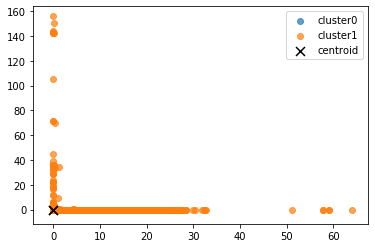

In [13]:
#A dibujar OIQWJD 

import matplotlib.pyplot as plt
%matplotlib inline

#Dibujando los clusters con 2 dimensiones o.o

for c in np.unique(cluster_index):
    plt.scatter(dataXVal[cluster_index == c, 0],
                dataXVal[cluster_index == c, 1],
                label = 'cluster'+str(c), alpha=.7)

#Dibujo de centroides XD

for centroid in som.get_weights():
    plt.scatter(centroid[:,0], centroid[:, 1], marker='x', s=80, linewidths=35, color='k', label='centroid')

plt.legend();

In [20]:
winner_coordinates
print(len(winner_coordinates[1]))

212795


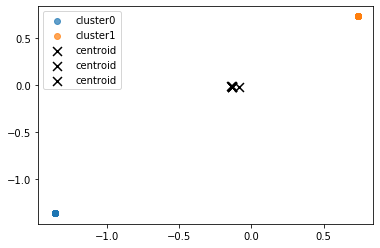

In [61]:
#Probemos con los Y 

#Red para Y

som_shape2 = (1,2)
som2 = MiniSom(som_shape2[0], som_shape2[1], 3, sigma=.3, learning_rate=.5,
             neighborhood_function='gaussian', random_seed=10)


winner_coordinates = np.array([som2.winner(x) for x in dataYVal]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape2)


#Dibujando centroides
for c in np.unique(cluster_index):
    plt.scatter(dataYVal[cluster_index == c, 0],
                dataYVal[cluster_index == c, 1],
                label = 'cluster'+str(c), alpha=.7)

#Dibujo de centroides XD

for centroid in som.get_weights():
    plt.scatter(centroid[:,0], centroid[:, 1], marker='x', s=80, linewidths=35, color='k', label='centroid')

plt.legend();